In [1]:
import chromadb
from chromadb.utils import embedding_functions

In [6]:
import os
OPENAI_API_KEY = os.getenv('OPENAI_CHROMA_API_KEY')
# default_ef = embedding_functions.OpenAIEmbeddingFunction(api_key = OPENAI_API_KEY, model_name="text-embedding-3-large")

In [25]:
default_ef = embedding_functions.SentenceTransformerEmbeddingFunction()

In [18]:
client = chromadb.PersistentClient(path="/Users/brandon/Desktop/MonteIntelligence/AARB_chunks")
client.list_collections()

[Collection(name=OpenAIEmbeddingFunction_RecursiveCharacterTextSplitter_400_200),
 Collection(name=SentEmbFunc_TokenTextSplitter_278_139),
 Collection(name=OpenAIEmbeddingFunction_TokenTextSplitter_400_200),
 Collection(name=OpenAIEmbeddingFunction_RecursiveCharacterTextSplitter_800_400),
 Collection(name=OpenAIEmbeddingFunction_RecursiveCharacterTextSplitter_400_0),
 Collection(name=SentEmbFunc_TokenTextSplitter_278_0),
 Collection(name=OpenAIEmbeddingFunction_TokenTextSplitter_800_400),
 Collection(name=OpenAIEmbeddingFunction_LLMSemanticChunker_0_0),
 Collection(name=OpenAIEmbeddingFunction_TokenTextSplitter_200_0),
 Collection(name=OpenAIEmbeddingFunction_TokenTextSplitter_400_0),
 Collection(name=OpenAIEmbeddingFunction_RecursiveCharacterTextSplitter_200_0),
 Collection(name=OpenAIEmbeddingFunction_ClusterSemanticChunker_400_0),
 Collection(name=SentEmbFunc_TokenTextSplitter_222_0),
 Collection(name=OpenAIEmbeddingFunction_ClusterSemanticChunker_200_0)]

In [17]:
client.delete_collection("SentEmbFunc_ClusterSemanticChunker_200_0")

In [4]:
client = chromadb.PersistentClient(path="/Users/brandon/Desktop/MonteIntelligence/AARB_chunks")
client.list_collections()

[Collection(name=SentEmbFunc_TokenTextSplitter_278_139),
 Collection(name=OpenAIEmbeddingFunction_TokenTextSplitter_400_200),
 Collection(name=SentEmbFunc_ClusterSemanticChunker_250_0),
 Collection(name=SentEmbFunc_TokenTextSplitter_278_0),
 Collection(name=OpenAIEmbeddingFunction_ClusterSemanticChunker_200_0),
 Collection(name=OpenAIEmbeddingFunction_TokenTextSplitter_800_400),
 Collection(name=OpenAIEmbeddingFunction_LLMSemanticChunker_0_0),
 Collection(name=OpenAIEmbeddingFunction_TokenTextSplitter_200_0),
 Collection(name=OpenAIEmbeddingFunction_TokenTextSplitter_400_0),
 Collection(name=SentEmbFunc_ClusterSemanticChunker_200_0),
 Collection(name=SentEmbFunc_TokenTextSplitter_222_0),
 Collection(name=OpenAIEmbeddingFunction_ClusterSemanticChunker_400_0)]

In [39]:
client.delete_collection("SentEmbFunc_RecursiveCharacterTextSplitter_250_0")

In [28]:
recursive_collection = client.get_collection(name="SentEmbFunc_RecursiveCharacterTextSplitter_250_125", embedding_function=default_ef)
# token_collection = client.get_collection(name="SentEmbFunc_TokenTextSplitter_278_139", embedding_function=default_ef)

In [8]:
recursive_collection.count()

1183

In [11]:
token_collection.count()

2359

In [19]:
len(recursive_collection.get(where={"corpus_id": "chatlogs"})['ids'])

21

In [15]:
len(cluster_collection.get(where={"corpus_id": "chatlogs"})['ids'])

22

In [21]:
recursive_collection.get(where={"corpus_id": "chatlogs"})['metadatas'][0]

{'corpus_id': 'chatlogs', 'end_index': 1871, 'start_index': 0}

In [22]:
cluster_collection.get(where={"corpus_id": "chatlogs"})['metadatas'][0]

{'corpus_id': 'chatlogs', 'end_index': 1837, 'start_index': 0}

In [25]:
recursive_collection.get(where={"corpus_id": "chatlogs"})['documents'][0]

'[{\'content\': "These instructions apply to section-based themes (Responsive 6.0+, Retina 4.0+, Parallax 3.0+ Turbo 2.0+, Mobilia 5.0+). What theme version am I using?\\nOn your Collections pages & Featured Collections sections, you can easily show the secondary image of a product on hover by enabling one of the theme\'s built-in settings!\\nYour Collection pages & Featured Collections sections will now display the secondary product image just by hovering over that product image thumbnail.\\nDoes this feature apply to all sections of the theme or just specific ones as listed in the text material?", \'role\': \'user\'}, {\'content\': \'This feature only applies to Collection pages and Featured Collections sections of the section-based themes listed in the text material.\', \'role\': \'assistant\'}, {\'content\': \'Can you guide me through the process of enabling the secondary image hover feature on my Collection pages and Featured Collections sections?\', \'role\': \'user\'}, {\'conten

In [23]:
cluster_collection.get(where={"corpus_id": "chatlogs"})['documents'][0]

'[{\'content\': "These instructions apply to section-based themes (Responsive 6.0+, Retina 4.0+, Parallax 3.0+ Turbo 2.0+, Mobilia 5.0+). What theme version am I using?\\nOn your Collections pages & Featured Collections sections, you can easily show the secondary image of a product on hover by enabling one of the theme\'s built-in settings!\\nYour Collection pages & Featured Collections sections will now display the secondary product image just by hovering over that product image thumbnail.\\nDoes this feature apply to all sections of the theme or just specific ones as listed in the text material?", \'role\': \'user\'}, {\'content\': \'This feature only applies to Collection pages and Featured Collections sections of the section-based themes listed in the text material.\', \'role\': \'assistant\'}, {\'content\': \'Can you guide me through the process of enabling the secondary image hover feature on my Collection pages and Featured Collections sections?\', \'role\': \'user\'}, {\'conten

In [ ]:
cluster_collection.get(where={"corpus_id": "chatlogs"})['documents'][0]

In [2]:
import tiktoken

# Count the number of tokens in each page_content
def num_tokens_from_string(string: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding("cl100k_base")
    num_tokens = len(encoding.encode(string, disallowed_special=()))
    return num_tokens

In [29]:
token_lengths = [num_tokens_from_string(x) for x in recursive_collection.get(where={"corpus_id": "wikitexts"})['documents']]

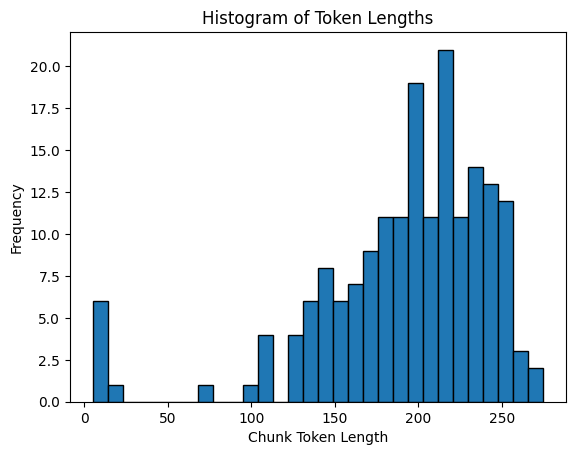

Median Token Length: 201.0
Mean Token Length: 191.29834254143645
Min Token Length: 5
Max Token Length: 275


In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Plot histogram of token lengths
plt.hist(token_lengths, bins=30, edgecolor='black')
plt.xlabel('Chunk Token Length')
plt.ylabel('Frequency')
plt.title('Histogram of Token Lengths')
plt.show()

# Calculate and print statistics
median_length = np.median(token_lengths)
mean_length = np.mean(token_lengths)
min_length = np.min(token_lengths)
max_length = np.max(token_lengths)

print(f"Median Token Length: {median_length}")
print(f"Mean Token Length: {mean_length}")
print(f"Min Token Length: {min_length}")
print(f"Max Token Length: {max_length}")


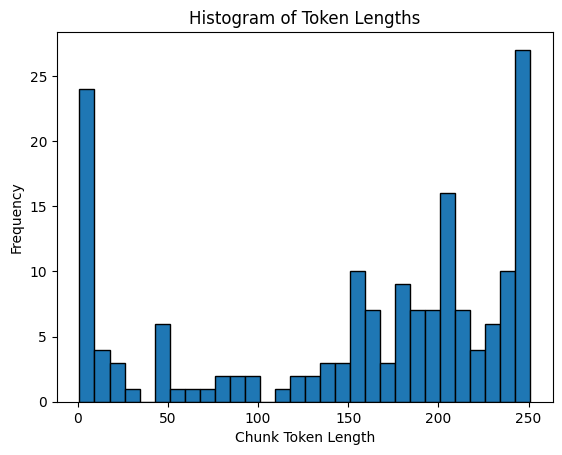

Median Token Length: 181.0
Mean Token Length: 154.49707602339183
Min Token Length: 1
Max Token Length: 251


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Plot histogram of token lengths
plt.hist(token_lengths, bins=30, edgecolor='black')
plt.xlabel('Chunk Token Length')
plt.ylabel('Frequency')
plt.title('Histogram of Token Lengths')
plt.show()

# Calculate and print statistics
median_length = np.median(token_lengths)
mean_length = np.mean(token_lengths)
min_length = np.min(token_lengths)
max_length = np.max(token_lengths)

print(f"Median Token Length: {median_length}")
print(f"Mean Token Length: {mean_length}")
print(f"Min Token Length: {min_length}")
print(f"Max Token Length: {max_length}")
# UPDATE CLUSTER CHUNKER TO GROUP UNDER 100 TOKENS.
